train data= 60000
test data= 10000
train_train_image= (60000, 28, 28)
test_train_image= (60000,)


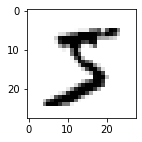

(60000, 784)
(10000, 784)
[5 0 4 1 9]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [7]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
np.random.seed(10)
import tensorflow as tf
from keras.datasets import mnist
(x_train_image, y_train_label), (x_test_image, y_test_label) = mnist.load_data()
print('train data=', len(x_train_image))
print('test data=', len(x_test_image))
print('train_train_image=', (x_train_image.shape))
print('test_train_image=', (y_train_label.shape))

import matplotlib.pyplot as plt
def plot_image(image):             #研究一下
    fig=plt.gcf()
    fig.set_size_inches(2, 2)
    plt.imshow(image,cmap='binary')
    plt.show()
    
plot_image(x_train_image[0])
y_train_label[0]

x_Train = x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')
print(x_Train.shape)
print(x_Test.shape)

x_train_image[0]

x_Train_normalize = x_Train/255
x_Test_normalize = x_Test/255
x_Train_normalize[0]

print(y_train_label[:5])

y_TrainOneHot = np_utils.to_categorical(y_train_label)
y_TestOneHot = np_utils.to_categorical(y_test_label)

y_TrainOneHot[:5]

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [9]:
model = Sequential()
model.add(Dense(units=1000, input_dim=784, kernel_initializer='normal', activation='relu'))

In [11]:
model.add(Dropout(0.5))

In [12]:
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

In [13]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout (Dropout)            (None, 1000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
train_history = model.fit(x=x_Train_normalize, y=y_TrainOneHot, validation_split=0.2, epochs=10, batch_size=200, verbose=2)

Epoch 1/10
240/240 - 3s - loss: 0.3501 - accuracy: 0.8945 - val_loss: 0.1618 - val_accuracy: 0.9545
Epoch 2/10
240/240 - 3s - loss: 0.1581 - accuracy: 0.9536 - val_loss: 0.1156 - val_accuracy: 0.9663
Epoch 3/10
240/240 - 3s - loss: 0.1158 - accuracy: 0.9654 - val_loss: 0.0969 - val_accuracy: 0.9690
Epoch 4/10
240/240 - 3s - loss: 0.0918 - accuracy: 0.9721 - val_loss: 0.0847 - val_accuracy: 0.9737
Epoch 5/10
240/240 - 3s - loss: 0.0751 - accuracy: 0.9773 - val_loss: 0.0822 - val_accuracy: 0.9747
Epoch 6/10
240/240 - 3s - loss: 0.0637 - accuracy: 0.9807 - val_loss: 0.0747 - val_accuracy: 0.9778
Epoch 7/10
240/240 - 3s - loss: 0.0536 - accuracy: 0.9832 - val_loss: 0.0723 - val_accuracy: 0.9776
Epoch 8/10
240/240 - 3s - loss: 0.0479 - accuracy: 0.9847 - val_loss: 0.0673 - val_accuracy: 0.9794
Epoch 9/10
240/240 - 3s - loss: 0.0407 - accuracy: 0.9874 - val_loss: 0.0666 - val_accuracy: 0.9793
Epoch 10/10
240/240 - 3s - loss: 0.0366 - accuracy: 0.9884 - val_loss: 0.0668 - val_accuracy: 0.9800

In [15]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train history')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

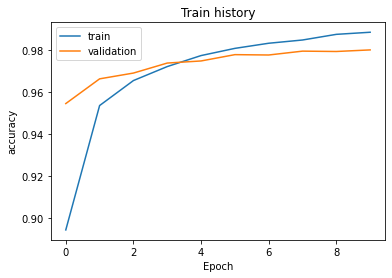

In [16]:
show_train_history(train_history, 'accuracy', 'val_accuracy')

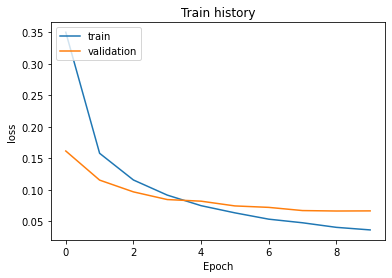

In [17]:
show_train_history(train_history, 'loss', 'val_loss')

In [18]:
scores = model.evaluate(x_Test_normalize, y_TestOneHot)
print()
print('accuracy = ', scores[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0602 - accuracy: 0.9813

accuracy =  0.9812999963760376


In [19]:
prediction = model.predict_classes(x_Test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [20]:
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [21]:
import pandas as pd
pd.crosstab(y_test_label,prediction, rownames=['label'], colnames=['predict'])
#print(y_test_label)
#print(prediction)

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,969,1,0,1,1,0,3,1,2,2
1,0,1126,2,2,0,1,2,0,2,0
2,6,1,1009,0,1,0,2,4,9,0
3,0,0,1,995,0,2,0,3,3,6
4,1,0,3,0,971,0,2,0,1,4
5,2,0,0,14,1,863,6,1,3,2
6,3,2,0,1,3,2,947,0,0,0
7,1,5,7,2,0,0,0,1003,4,6
8,4,1,3,4,5,1,3,2,945,6


In [22]:
df = pd.DataFrame({'label':y_test_label, 'predict':prediction})
df[:20]

,label,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9


In [23]:
df[(df.label!=df.predict)]

,label,predict
247,4,2
321,2,7
340,5,3
445,6,0
448,9,8
...,...,...
9808,9,4
9839,2,7
9904,2,0
9944,3,8


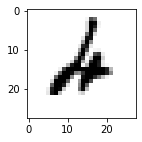

predtion =  2


In [24]:
plot_image(x_test_image[247])
print('predtion = ', prediction[247])